In [1]:
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize

%config InlineBackend.figure_formats = ['svg']

# MPL
import matplotlib
import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.patches import Patch
plt.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['legend.fontsize'] = 12
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['legend.title_fontsize'] = 12
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['figure.dpi'] = 250
matplotlib.rcParams['figure.figsize'] = (5,5)

#colors
cmap = plt.get_cmap("viridis")
colors_b = sns.color_palette("colorblind")
colors_s = sns.color_palette("Set2")
viridis = cm.get_cmap('flare', 7)
colors = [viridis(i) for i in range(9)]
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

/var/folders/cm/wyr4f7dd46340qyn2n3sgyzm0000gn/T/ipykernel_97504/3039637911.py:35: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('flare', 7)


### Importing Data

In [2]:
res128 = pd.read_pickle('../data/Adam_160M_SP_SL2048_2Btok_BS128.pkl')
res256 = pd.read_pickle('../data/Adam_160M_SP_SL2048_2Btok_BS256.pkl')
res512 = pd.read_pickle('../data/Adam_160M_SP_SL2048_2Btok_BS512.pkl')

In [3]:
res128

optim  num_steps   bs      lr   wd  beta1    beta2    ppl_train  \
299  adamw       9600  128  0.0005  0.1  0.950  0.80000    25.079490   
261  adamw       9600  128  0.0005  0.1  0.975  0.97500    25.225355   
262  adamw       9600  128  0.0005  0.1  0.975  0.95000    24.811535   
238  adamw       9600  128  0.0005  0.1  0.900  0.60000    24.660574   
237  adamw       9600  128  0.0005  0.1  0.900  0.90000    25.618229   
..     ...        ...  ...     ...  ...    ...      ...          ...   
266  adamw       9600  128  0.0160  0.1  0.975  0.99375  2012.279736   
271  adamw       9600  128  0.0160  0.1  0.975  0.95000    22.520725   
276  adamw       9600  128  0.0160  0.1  0.950  0.97500    28.186858   
256  adamw       9600  128  0.0160  0.1  0.975  0.90000  2464.753133   
231  adamw       9600  128  0.0160  0.1  0.900  0.80000  1735.208046   

                                               ppl_all     ppl_test  
299  [19154.490053904505, 16731.557399624355, 13941...    25.445555  
261  [33525.45090174386, 19692.663652800486, 16385....    25.087691  
262  [58294.98627541683, 18725.414561978163, 14967....    25.138344  
238  [11429.337887573834, 9805.293214984942, 5890.6...    25.814918  
237  [48683.692823764926, 19586.148694292224, 15859...    25.198654  
..                                                 ...          ...  
266  [3063.94380693143, 2824.1882504743044, 2943.77...  1985.810958  
271  [3347.0358808236474, 3076.240836915773, 3321.5...    23.375310  
276  [19868.87495667048, 1680.56867510606, 1175.801...    27.745107  
256  [13963.616913178896, 14845.945868063258, 11404...  2393.716464  
231  [58294.98627541683, 2119.2474698224382, 1462.6...  1652.075841  

[150 rows x 10 columns]

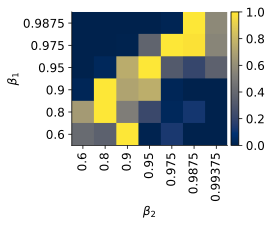

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


b1 = [0.9, 0.95, 0.975]
b2 = [0.6, 0.8, 0.9, 0.95, 0.975, 0.9875, 0.99375]
choices = [0.6, 0.8, 0.9, 0.95, 0.975, 0.9875, 0.99375]

def getplot(r):
    res = r[['lr','beta1', 'beta2', 'ppl_test']].to_numpy()
    tab = np.zeros((len(b2),len(b2)))
    for i in range(len(b2)):
        for j in range(len(b2)):
            best_value = 10000000
            for k in range(len(res)):
                if ((res[k,1] == choices[i]) & (res[k,2] == choices[j])):
                    best_value = np.min([best_value, res[k,3]])
            tab[i,j] = best_value
    return tab

def row_softmax_with_temperature(x, tau=1):
    assert tau > 0, "Temperature tau must be positive."
    x_stable = x - np.max(x, axis=1, keepdims=True)
    x_scaled = x_stable / tau
    exp_x = np.exp(x_scaled)
    softmax = exp_x #/ np.sum(exp_x, axis=1, keepdims=True)
    return softmax

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

fig, ax = plt.subplots(figsize=(3,3))

im = ax.imshow(np.flip(row_softmax_with_temperature(-getplot(res256)[:-1,:], tau=0.25), axis=0), cmap='cividis')

tick_positions = np.arange(len(b2))
tick_labels = b2

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=90)
ax.set_yticks(tick_positions[:-1])
ax.set_yticklabels(np.flip(np.array(tick_labels[:-1])))

ax.set_ylabel(r'$\beta_1$')
ax.set_xlabel(r'$\beta_2$')

# Properly sized and aligned colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax)
#plt.savefig('betas_correlation2.pdf', format="pdf", bbox_inches="tight")


In [7]:
fig, ax = plt.subplots(figsize=(3,3))

b1= [0.9, 0.95, 0.975]
im = ax.imshow(np.flip(row_softmax_with_temperature(-getplot(res256)[:-1,:], tau=0.25), axis=0)[1:4], cmap='cividis')

tick_positions2 = np.arange(len(b1))
tick_labels2 = np.flip(np.array(b1))

ax.set_xticks(tick_positions)
ax.set_xticklabels(tick_labels, rotation=90)
ax.set_yticks(tick_positions2)
ax.set_yticklabels(tick_labels2)

ax.set_ylabel(r'$\beta_1$')
ax.set_xlabel(r'$\beta_2$')

# Properly sized and aligned colorbar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax)
#plt.savefig('betas_correlation2.pdf', format="pdf", bbox_inches="tight")